# 🕸️ Scrapify

<!-- [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YonaniCodes/Scrapify/blob/main/notebooks/scrapify-demo.ipynb) -->


In [1]:
import sys
import os

# Verify we're running in Colab - exit if not
try:
    import google.colab
except ImportError:
    raise RuntimeError("This script is designed to run only in Google Colab")

# Define repo details
repo_url = "https://github.com/YonaniCodes/Scrapify.git"
repo_path = "/content/Scrapify"

# Clone or update the repository
if not os.path.exists(repo_path):
    !git clone {repo_url} {repo_path}
else:
    %cd {repo_path}
    !git stash  # Stash any local changes
    !git pull

# Add src/ to Python path
sys.path.append(f"{repo_path}/src")

# Import the scraper function (replace with actual import)
# from scraper_module import scrape_function
!pip install -r requirements.txt
!pip install PyMuPDF


Cloning into '/content/Scrapify'...
remote: Enumerating objects: 316, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 316 (delta 86), reused 18 (delta 14), pack-reused 176 (from 1)
Receiving objects: 100% (316/316), 817.12 KiB | 3.66 MiB/s, done.
Resolving deltas: 100% (168/168), done.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 25.8 MB/s eta 0:00:00


In [2]:
import subprocess

# Get output of ls command
output = subprocess.check_output("ls", shell=True).decode().splitlines()

# Now you can conditionally check
if "firebase-adminsdk.json" in output:
    print("Everything is ready you can start working 🎉🎉🎉🎉")
else:
    print("firebase-adminsdk.json not found.😒😒😒 please ask Yonani for the file")

firebase-adminsdk.json not found.😒😒😒 please ask Yonani for the file


In [3]:
import sys
sys.path.append('/content/Scrapify/src')

In [7]:
from scrapify import scrape
from scrapify import get_report
from preprocessing import normalize_amharic

import pandas as pd

## Steps to Scrape a website

1. Install the  `googlesearch-python` module
2. Define a function that takes two arguments `num_urls` and `search_query`. and return list of urls
3. call the `scrape` method by passing list of `urls` and `your_name` as a second paramete (optional).

In [ ]:
!pip install googlesearch-python

In [8]:
from googlesearch import search

def get_links_from_simple_search(query, num_results):
    """
    Retrieves URLs from a simple Google search.

    Args:
        query (str): The search query.
        num_results (int): The desired number of search results. This is not directly supported by googlesearch,
                          so it will be used to limit the results after fetching.

    Returns:
        list: A list of URLs.
    """
    # Fetch the search results
    search_results = search(query, num_results=num_results)
    # Convert the generator object to a list
    urls = list(set(search_results))
    return urls

We need a function to filter if the url is already scraped we dont wanna send reques to our backend everyurl that is returned by the function `get_links_from_simple_search`

In [9]:
def filter_url(urls):
# Assuming scraped_data and unscraped_data are pandas DataFrames with a 'url' column
  scraped,unscrape=get_report()
  scraped_data= pd.DataFrame(scraped)
  unscraped_data= pd.DataFrame(unscrape)
  filtered_urls = []
  for url in urls:
      # Check if the URL is NOT in both scraped_data.url and unscraped_data.url
      if url not in scraped_data['url'].values and url not in unscraped_data['url'].values:
          filtered_urls.append(url)
  return filtered_urls

# **Lets visualize our scraping status**

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_scraping_report():
    """
    Generate a pie chart showing the ratio of scraped to unscraped URLs.
    Uses get_report() internally to fetch the data.
    """
    # Get the data
    scraped, unscraped = get_report()

    # Convert to DataFrames
    scraped_data = pd.DataFrame(scraped)
    unscraped_data = pd.DataFrame(unscraped)

    # Calculate counts
    scraped_count = len(scraped_data['url'])
    unscraped_count = len(unscraped_data['url'])

    # Prepare data for visualization
    labels = ['Scraped URLs', 'Unscraped URLs']
    sizes = [scraped_count, unscraped_count]
    colors = ['salmon', 'lightblue']  # Green and red

    # Create the figure
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(sizes,
           labels=labels,
           colors=colors,
           autopct=lambda p: f'{p:.1f}%\n({int(p/100*sum(sizes))})',
           startangle=90,
           wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
           textprops={'fontsize': 12})

    ax.set_title('Scraping Report: Scraped vs Unscraped URLs', pad=20, fontsize=14)
    plt.tight_layout()




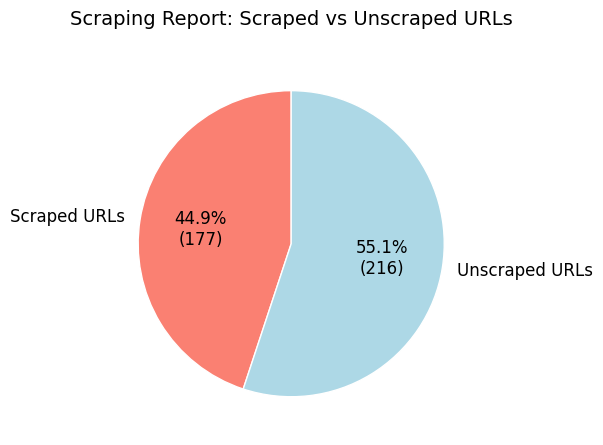

In [ ]:
# Example usage:
plot_scraping_report()

### Normalizing our data


In order to normalize our well define
1. deffine a function `read_jsonl_content` to read jsoln file
2. normalize the text returned using `normalize_and_save_data`
3. Finall define the wraper function `normalize_jsonl_file`



In [11]:
import json

def read_jsonl_content(file_path, content_key='content'):
    """Returns a list of 'content' values from a .jsonl file."""
    content_values = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            stripped_line = line.strip()
            if stripped_line:
                record = json.loads(stripped_line)
                content_values.append(record[content_key])

    print(f"Read {len(content_values)} records from {file_path}.")
    return content_values  # Example: ["text1", "text2", ...]

In [12]:
def normalize_and_save_data(jsonl_data, file_path):
    """Writes all JSONL entries as one continuous text blob."""
    with open(file_path, 'w', encoding='utf-8') as f:
        all_text = " ".join(normalize_amharic(text) for text in jsonl_data)  # No newlines
        f.write(all_text)

In [13]:
def normalize_jsonl_file(input_file, output_file):
  jsonl_data=read_jsonl_content(test_file_path)
  normalize_and_save_data(jsonl_data, destination_file_path)

How to normalize data?

1. define `test_file_path` the jsonl file is found.
2. define `destination` you want to store the normaliez text file
3. call the function `normalize_and_save_data  ` with the two parameters
4. finnally call the wraper function

In [14]:
test_file_path = 'extracted_data (5).jsonl'
destination_file_path = 'normalized.txt'

normalize_jsonl_file(test_file_path, destination_file_path)


Read 169 records from extracted_data (5).jsonl.


### Chunking the data. now is the time to chunk all the data.

In [33]:
import os
import re
import shutil
from google.colab import files

def read_normalized_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()


# def chunk_text(text, chunk_size=1000, chunk_overlap=20):
#     chunks = []
#     start = 0
#     while start < len(text):
#         end = start + chunk_size
#         chunks.append(text[start:end])
#         start = end - chunk_overlap
#     return chunks


# def save_chunks_as_files(chunks: list[str], output_dir: str, base_filename: str = "chunk"):
#     """
#     Saves each text chunk as an individual .txt file.

#     Args:
#         chunks: List of text chunks (strings)
#         output_dir: Directory to save the files
#         base_filename: Prefix for filenames (default: "chunk")

#     Returns:
#         List of paths to the created files
#     """
#     os.makedirs(output_dir, exist_ok=True)  # Create dir if it doesn't exist
#     saved_paths = []

#     for i, chunk in enumerate(chunks, start=1):
#         # Format: "{output_dir}/chunk_1.txt", "{output_dir}/chunk_2.txt", etc.
#         file_path = os.path.join(output_dir, f"{base_filename}_{i}.txt")

#         with open(file_path, 'w', encoding='utf-8') as file:
#             file.write(chunk)
#         saved_paths.append(file_path)

#     print(f"Saved {len(saved_paths)} files:")
#     for path in saved_paths[:10]:
#       print(f"→ {path}")

def split_sentences(file_path: str) -> list:
    """
    Reads a .txt file and splits its content into sentences using ።, !, or ? as delimiters.

    Args:
        file_path: Path to the input text file.

    Returns:
        List of sentences (strings), each ending with a delimiter.
    """
    with open(file_path, "r", encoding="utf-8", errors='ignore') as f:
        text = f.read()
        text = re.sub(r'\(\s*\)', '', text)
    sentences = []
    current_sentence = ""

    for char in text:
        current_sentence += char
        if char in {'።', '!', '?'}:
            stripped = current_sentence.strip()
            if stripped:
                sentences.append(stripped)
            current_sentence = ""

    if current_sentence.strip():
        sentences.append(current_sentence.strip())

    return sentences


def chunk_by_char_limit(sentences: list, output_dir: str, char_limit: int = 30000, max_sentences_per_chunk: int = 100, overlap: int = 7):
    """
    Splits list of sentences into chunks with up to 100 sentences, ensuring that chunks do not exceed
    `char_limit` characters. Each chunk has an overlap of `overlap` sentences with the previous chunk.

    Args:
        sentences: List of sentence strings.
        output_dir: Directory where chunks will be saved.
        char_limit: Maximum number of characters per chunk.
        max_sentences_per_chunk: Maximum number of sentences in each chunk.
        overlap: Number of overlapping sentences between chunks.
    """
    os.makedirs(output_dir, exist_ok=True)

    chunks = []
    current_chunk = []
    current_length = 0
    chunk_start_index = 0  # Keep track of where each chunk starts in the sentence list

    while chunk_start_index < len(sentences):
        # Build a chunk with up to max_sentences_per_chunk and a total character count <= char_limit
        current_chunk = []
        current_length = 0

        # Try to fit in up to max_sentences_per_chunk sentences without exceeding the char_limit
        for i in range(chunk_start_index, min(chunk_start_index + max_sentences_per_chunk, len(sentences))):
            sentence_length = len(sentences[i]) + 1  # Add 1 for space or newline
            if current_length + sentence_length > char_limit:
                break
            current_chunk.append(sentences[i])
            current_length += sentence_length

        # If the chunk exceeds the char_limit, reduce the chunk size by removing sentences from the end
        while current_length > char_limit and len(current_chunk) > 1:
            current_chunk.pop()
            current_length -= len(current_chunk[-1]) + 1

        # Save the current chunk
        chunks.append(current_chunk)

        # Update chunk_start_index to ensure an overlap of 'overlap' sentences
        chunk_start_index = chunk_start_index + max(1, len(current_chunk) - overlap)

    # Write each chunk to a file
    for i, chunk in enumerate(chunks, start=1):
        filename = os.path.join(output_dir, f"chunk_{i}.txt")
        with open(filename, "w", encoding="utf-8") as f:
            f.write(" ".join(chunk))
        print(f"Saved: {filename}")

def zip_chunks_folder(folder_path):
    zip_file_path = f"{folder_path}.zip"
    shutil.make_archive(folder_path, 'zip', folder_path)
    return zip_file_path



In [34]:
import datetime
normalized_file_path = '/content/normalized.txt'
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
destination_file_path = f'chunks{timestamp}'
# text=read_normalized_text(normalized_file_path)
# chunks=chunk_text(text)
# save_chunks_as_files(chunks,destination_file_path)

all_sentences = split_sentences(normalized_file_path)
chunk_by_char_limit(all_sentences,destination_file_path)



Saved: chunks20250424_140246/chunk_1.txt
Saved: chunks20250424_140246/chunk_2.txt
Saved: chunks20250424_140246/chunk_3.txt
Saved: chunks20250424_140246/chunk_4.txt
Saved: chunks20250424_140246/chunk_5.txt
Saved: chunks20250424_140246/chunk_6.txt
Saved: chunks20250424_140246/chunk_7.txt
Saved: chunks20250424_140246/chunk_8.txt
Saved: chunks20250424_140246/chunk_9.txt
Saved: chunks20250424_140246/chunk_10.txt
Saved: chunks20250424_140246/chunk_11.txt
Saved: chunks20250424_140246/chunk_12.txt
Saved: chunks20250424_140246/chunk_13.txt
Saved: chunks20250424_140246/chunk_14.txt
Saved: chunks20250424_140246/chunk_15.txt
Saved: chunks20250424_140246/chunk_16.txt
Saved: chunks20250424_140246/chunk_17.txt
Saved: chunks20250424_140246/chunk_18.txt
Saved: chunks20250424_140246/chunk_19.txt
Saved: chunks20250424_140246/chunk_20.txt
Saved: chunks20250424_140246/chunk_21.txt
Saved: chunks20250424_140246/chunk_22.txt
Saved: chunks20250424_140246/chunk_23.txt
Saved: chunks20250424_140246/chunk_24.txt
S

## Downloading the chunks

In [35]:
zip_file_path = zip_chunks_folder("/content/chunks20250424_140246")
files.download(zip_file_path)

print(f"Chunks folder zipped and ready for download: {zip_file_path}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Chunks folder zipped and ready for download: /content/chunks20250424_140246.zip
